# Deep Convolutional Neural Networks (AlexNet)

In this notebook, we will build an AlexNet from scratch. First, import all the libraries.

In [1]:
from d2l import mxnet as d2l
from mxnet import gluon, np, npx
from mxnet.gluon import nn
npx.set_np()

## The dataset

We will use Fashion-MNIST dataset as a demo example. It contains 10 categories of clothing images, with 60,000 images in the training set and 10,000 in the test set.

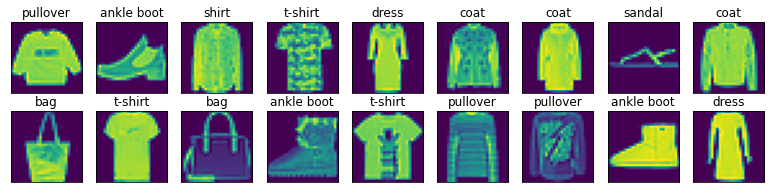

In [2]:
mnist_train = gluon.data.vision.FashionMNIST(train=True)
X, y = mnist_train[:18]
d2l.show_images(X.squeeze(axis=-1), 2, 9, titles=d2l.get_fashion_mnist_labels(y));

Now let's load the training and test set in an iterator with a batch size of 128.

In [ ]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=128, resize=224)

## The Alexnet model

To construct an Alexnet, we firstly define a new `Sequential()` architecture, which can stack neural network layers sequentially. 

In [4]:
alexnet = nn.Sequential()
alexnet.add(# A larger 11 x 11 window to capture large objects.
            nn.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
            nn.MaxPool2D(pool_size=3, strides=2),
            # Make the convolution window smaller, and increase the
            # number of output channels
            nn.Conv2D(256, kernel_size=5, padding=2, activation='relu'),
            nn.MaxPool2D(pool_size=3, strides=2),
            # Use three successive convolutional layers and a smaller 
            # convolution window
            nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
            nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
            nn.Conv2D(256, kernel_size=3, padding=1, activation='relu'),
            nn.MaxPool2D(pool_size=3, strides=2),
            # Several times larger fully connected layers with dropout
            nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
            nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
            nn.Dense(10))

Check the outputs layer by layer

In [5]:
X = np.random.uniform(size=(1, 1, 224, 224))
alexnet.initialize()
for layer in alexnet:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv0 output shape:	 (1, 96, 54, 54)
pool0 output shape:	 (1, 96, 26, 26)
conv1 output shape:	 (1, 256, 26, 26)
pool1 output shape:	 (1, 256, 12, 12)
conv2 output shape:	 (1, 384, 12, 12)
conv3 output shape:	 (1, 384, 12, 12)
conv4 output shape:	 (1, 256, 12, 12)
pool2 output shape:	 (1, 256, 5, 5)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


## Training

For simplicity, we call the built-in function `train_ch6` ([more detail in D2L](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html)) to train. 

We also need to define the hyperparameters:
1. the learning rate `lr`, 
2. the number of epochs `num_epochs`.

In [ ]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(alexnet, train_iter, test_iter, num_epochs, lr)